In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

In [13]:
n = 5; 
optNodes = 4;
areaLim = 10 # consider there is 
positionsGivenNodes  = np.random.uniform(-10, 10,(n,2)) # random position of given nodes
positionsOptNodes = np.random.uniform(-10, 10,(optNodes,2)) # random position of given nodes

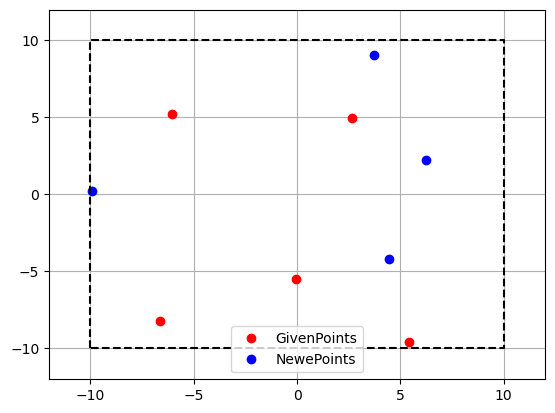

In [14]:
def visualization(positionsGivenNodes, positionsOptNodes):
    plt.plot(positionsGivenNodes[:,0],positionsGivenNodes[:,1], 'or', label='GivenPoints', linestyle = 'None')
    plt.plot(positionsOptNodes[:,0],positionsOptNodes[:,1], 'ob',   label='NewePoints', linestyle = 'None')
    plt.xlim([-areaLim-2, areaLim+2])
    plt.ylim([-areaLim-2, areaLim+2])
    plt.plot([-areaLim, -areaLim, areaLim, areaLim, -areaLim], [-areaLim, areaLim, areaLim, -areaLim, -areaLim],'--k') 
    plt.grid()
    plt.legend()
    plt.show()

visualization(positionsGivenNodes, positionsOptNodes)

In [15]:
#Objective: all points in in given area (or as close it as possible), and distance between all points is much equal as possible

In [16]:
def distanceBetweenTwoPoints(point1, point2):
    return np.linalg.norm(point1-point2)
# test func
point1, point2 = positionsGivenNodes[0], positionsOptNodes[1]
print(point1, point2)
distanceBetweenTwoPoints(point1, point2)

[ 5.42641287 -9.58496101] [-9.92103467  0.24384527]


18.22497129917185

In [17]:
def averageDistanceBetweenAllPoints(positionsGivenNodes, positionsOptNodes):
    fullDistance, totalEdges = 0, 0
    # betweeen 
    for i in range(0, len(positionsGivenNodes)):
        for j in range(0, len(positionsOptNodes)):
            fullDistance += distanceBetweenTwoPoints(positionsGivenNodes[i], positionsOptNodes[j])
            totalEdges += 1

    for i in range(0, len(positionsOptNodes)):
        for j in range(i+1, len(positionsOptNodes)):
            fullDistance += distanceBetweenTwoPoints(positionsOptNodes[i], positionsOptNodes[j])
            totalEdges += 1
    return fullDistance / totalEdges

# test func
avgDist = averageDistanceBetweenAllPoints(positionsGivenNodes, positionsOptNodes)
print(avgDist)

11.645765692941966


In [18]:
def objectiveFunction(positionsGivenNodes, positionsOptNodes):

    objFuncVal = 0
    
    avgDist = averageDistanceBetweenAllPoints(positionsGivenNodes, positionsOptNodes)
    
    # betweeen 
    for i in range(0, len(positionsGivenNodes)):
        for j in range(0, len(positionsOptNodes)):
            eddgeDistance = distanceBetweenTwoPoints(positionsGivenNodes[i], positionsOptNodes[j])
            objFuncVal += (avgDist - eddgeDistance)**2

    for i in range(0, len(positionsGivenNodes)):
        for j in range(i+1, len(positionsOptNodes)):
            eddgeDistance =  distanceBetweenTwoPoints(positionsOptNodes[i], positionsOptNodes[j])
            objFuncVal += (avgDist - eddgeDistance)**2
    return objFuncVal

objVal = objectiveFunction(positionsGivenNodes, positionsOptNodes)

# test func (current objective value)
print(objVal)

549.8068365466877


In [19]:
def quasiGradient(positionsGivenNodes, positionsOptNodes):
    h = 0.00001
    f0 = objectiveFunction(positionsGivenNodes, positionsOptNodes)
    df = positionsOptNodes * 0;
    for i in range(0, len(positionsOptNodes)):
        for j in range (0,2): # x and y coordinates
            positionsOptNodesNew = positionsOptNodes; 
            positionsOptNodesNew[i][j] += h
            f1 = objectiveFunction(positionsGivenNodes, positionsOptNodesNew)
            df[i][j] = (f1-f0)/h;
    return df
# test func
grad = quasiGradient(positionsGivenNodes, positionsOptNodes)
print(grad)

[[13.88215575 33.93156654]
 [ 4.86725249  9.99808127]
 [ 9.64026913 21.68550187]
 [22.80806159 12.59345518]]


In [20]:
# optimization

In [21]:
iter, step, eps = 0, 0.1, 1e-6
objValOld = objectiveFunction(positionsGivenNodes, positionsOptNodes)
print("initial:  " + str(objValOld))
grad = quasiGradient(positionsGivenNodes, positionsOptNodes)
while np.linalg.norm(grad[:,:]) > eps and iter < 1000 and step > 1e-6:
    grad = grad/np.linalg.norm(grad[:,:]);
    positionsOptNodes -= step * grad
    objValNew = objectiveFunction(positionsGivenNodes, positionsOptNodes)   
    print(objValNew)
    if objValOld < objValNew:
        positionsOptNodes += step * grad
        step = step * 0.9
    else:
        objValOld = objValNew
    grad = quasiGradient(positionsGivenNodes, positionsOptNodes)
    iter += 1
print("after optimization:  " + str(objValNew))

initial:  549.8069624812395
548.0192314147848
546.2031915853404
544.3576818280693
542.4816294205878
540.5740745066372
538.6341967621752
536.661343701848
534.6550598227855
532.6151154890697
530.5415341382419
528.4346161782745
526.294957820095
524.1234631173594
521.9213476099125
519.6901324924053
517.4316287394864
515.1479114234753
512.8412853226531
510.5142436002717
508.16942203669413
505.80955164139505
503.4374124809863
501.05579134874176
498.66744545227186
496.2750735777773
493.8812955360319
491.4886400416541
489.0995405664721
486.7163383485389
484.3412913805154
481.97658804520285
479.62436396394503
477.28672047379723
474.9657430056989
472.66351746895157
470.38214233209186
468.12373379918085
465.8904209848316
463.68432782726546
461.50753853277155
459.362044242463
457.2496703627239
455.17198689900107
453.1302080071572
451.1250910072857
449.1568481712973
447.22508560116444
445.32878111546273
443.46630776570777
441.6355021997458
439.83376977713215
438.05821298943874
436.3057674739841
434

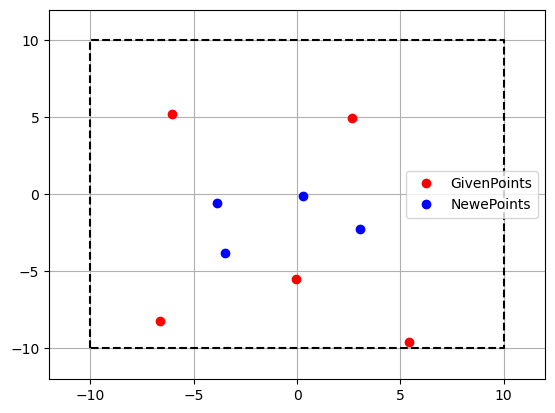

In [22]:
visualization(positionsGivenNodes, positionsOptNodes)